# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [11]:
from urllib import request
from zipfile import ZipFile

def download(file, url):
    res = request.urlopen(url)
    with open(file,'wb') as fp:
        fp.write(res.read())   

In [12]:
# import chardet

# with open('PoliceShootingsUS.csv', 'rb') as f:
#     content = f.read()
#     result = chardet.detect(content)
# result

In [13]:
file_url = 'https://github.com/msaricaumbc/DS_data/blob/master/lab_data.zip?raw=true'
file_name = 'lab_data'

download(file_name, file_url)

In [14]:
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!')

In [15]:
unzip(file_name)

File Name                                             Modified             Size
PoliceShootingsUS.csv                          2021-09-21 20:53:54       227653
__MACOSX/._PoliceShootingsUS.csv               2021-09-21 20:53:54          276
volunteers.txt                                 2021-10-06 00:32:28         7015
__MACOSX/._volunteers.txt                      2021-10-06 00:32:28          176
Extracting all the files now...
Done!


In [17]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 24CF-DE8E

 Directory of C:\Users\Achal Gupta\Desktop\Arushi\Data601\Data_601\Week06

03/10/2022  08:38 PM    <DIR>          .
03/10/2022  08:38 PM    <DIR>          ..
03/10/2022  08:38 PM    <DIR>          .ipynb_checkpoints
03/10/2022  08:19 PM             2,144 hw-06.ipynb
03/10/2022  08:37 PM            65,861 lab_data
03/10/2022  08:37 PM           227,653 PoliceShootingsUS.csv
03/10/2022  08:37 PM             7,015 volunteers.txt
03/10/2022  08:38 PM             6,227 week06_lab.ipynb
03/10/2022  08:37 PM    <DIR>          __MACOSX
               5 File(s)        308,900 bytes
               4 Dir(s)  181,325,955,072 bytes free


## Reading data from a csv file

For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [21]:
import pandas as pd

In [32]:
df = pd.read_csv('PoliceShootingsUS.csv', encoding = 'latin1')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [33]:
## How many offenders are older than 55?
count = 0
for ele in df.index:
    if df['age'][ele] > 55:
        count = count + 1
print(count)


235


* What's the age distribution?

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

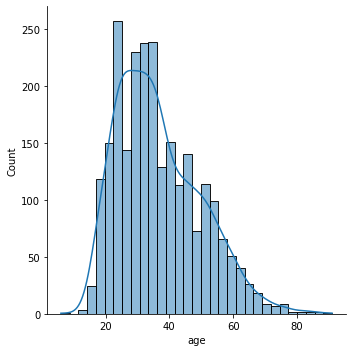

In [41]:
## Your code is here
import seaborn as sns

plot = sns.displot(data = df, x = 'age', kde = True)

## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [58]:
## Your code is here
first=[]
last= []
state_list=[]
with open('volunteers.txt', 'r') as text_file:
    lines = text_file.readlines()
    with open('volunteers.csv', 'w') as csv_file:
    
        for line in lines:
            line = line.replace("(", ',')
            line = line.split(',')
            fn = line[0]
            fn = fn.split('[')[1]
            first.append(fn)
            ln = line[1]
            ln = ln.split(']')[0]
            ln= ln.replace(' ','')
            last.append(ln)
            state = line[2]
            state = state.split(')')[0]
            state_list.append(state)
#             print(fn)
#             print(ln)
#             print(state)
#             fieldnames = ['firstname', 'lastname', 'state']
#     ## instantiate csv.DictWriter with file and fieldnames as writer
#             writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        

Harding
Christine
Virginia
Davis
Kimberly
New York
Ingram
Rachel
Louisiana
Walker
Richard
Oregon
Barnes
Francisco
Virginia
Perez
Rachel
Alaska
Choi
Linda
Iowa
Gomez
Janice
Vermont
Lloyd
Jesus
Connecticut
Moore
Alicia
Michigan
Murray
Pamela
Arizona
Moore
Brittney
Washington
Jones
Alexander
Arizona
Morales
David
Florida
Hogan
Elizabeth
Rhode Island
Floyd
Courtney
Pennsylvania
Scott
Mark
West Virginia
Johnson
Philip
North Carolina
Taylor
Michael
New Hampshire
Freeman
Barbara
Pennsylvania
Humphrey
Shawn
Oklahoma
Schultz
Ernest
South Carolina
Harper
Alexander
Mississippi
Shaw
Kendra
Nebraska
Glenn
Samantha
Louisiana
Jackson
Kara
Wyoming
Rivera
Vickie
North Carolina
Robinson
Matthew
Iowa
Taylor
Nicole
Kansas
Harper
Eric
South Dakota
Smith
Karen
Oklahoma
Chavez
Donald
Nebraska
Thompson
Sarah
Ohio
Gibson
Veronica
Vermont
Taylor
Steven
Montana
Mitchell
Alexandra
North Carolina
Simmons
Nicole
Texas
Ramirez
Riley
South Dakota
Lopez
Kenneth
Colorado
Rose
Jeffery
Kentucky
Brown
Nichole
Wisconsin
Zi